In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Conducting exploratory analysis on engine data
df = pd.read_csv("./CMaps/train_FD001.txt", delimiter=' ')

In [3]:
# Opening of data reveals that there is no data labels so I am naming them here
column_names = ["unit_number","cycle_number","operational_setting_1","operational_setting_2","operational_setting_3"]
print(len(df.columns))
# The rest of the columns are sensor measurements, let's label the remaining by an index 
for k in range(1,len(df.columns)-len(column_names)+1):
    column_names.append("sensor_measurement_{}".format(k))

df.columns = column_names

28


In [4]:
df.head()

,unit_number,cycle_number,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,NaN,NaN


In [5]:
# How many engines are in this dataset?
len(df["unit_number"].unique())

100

In [6]:
# What is the longest and shortest suriving engines?
print("Max Cycle length: {}".format(max(df["cycle_number"])))

Max Cycle length: 362


In [7]:
# Which engine is this? looks like Unit 69, we can use this as a benchmark for normal range of operating sensor values
df.loc[df["cycle_number"]==362]

,unit_number,cycle_number,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
13991,69,362,0.0007,-0.0,100.0,518.67,643.75,1598.16,1428.28,14.62,...,8124.27,8.5126,0.03,397,2388,100.0,38.42,22.9782,NaN,NaN


In [8]:
# Grouping dataset by unit number\
df_units = df.groupby("unit_number")['cycle_number'].max()

# What is the max and min of the cycle number?
print("Min cycles: {} and Max cycles: {}".format(min(df_units), max(df_units)))

# Lets find the unit with the least number of cycles, that failed the earliest
print("\nUnit with most cycles:")
print(df_units.loc[df_units==max(df_units)])
print("\nUnit with least cycles:")
print(df_units.loc[df_units==min(df_units)])

# cycle_values = df_units.to_numpy()
# unit_num = [x for x in range(1,len(cycle_values)+1)]
# print(cycle_values, unit_num)
# plt.plot(unit_num, cycle_values)

Min cycles: 128 and Max cycles: 362

Unit with most cycles:
unit_number
69    362
Name: cycle_number, dtype: int64

Unit with least cycles:
unit_number
39    128
Name: cycle_number, dtype: int64


5


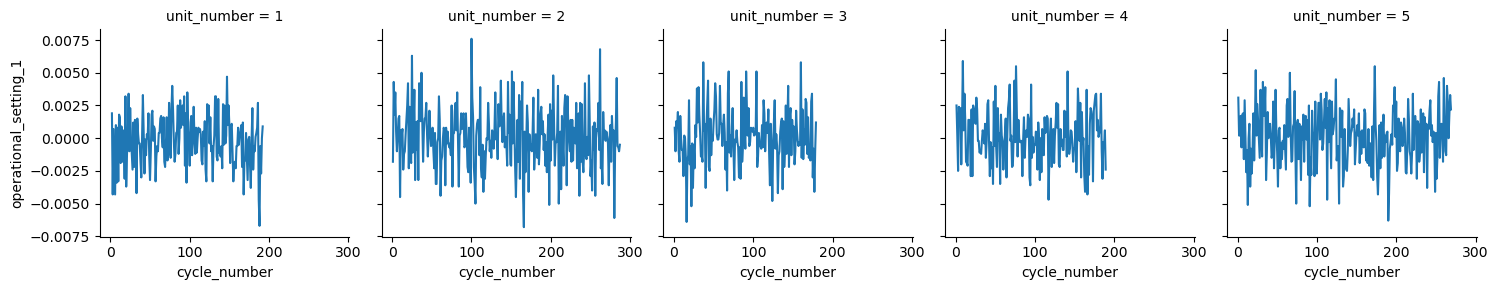

10


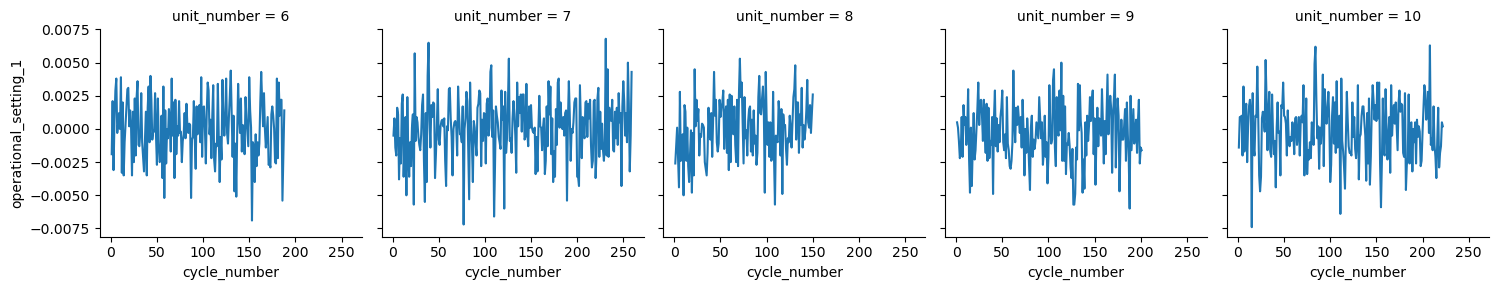

15


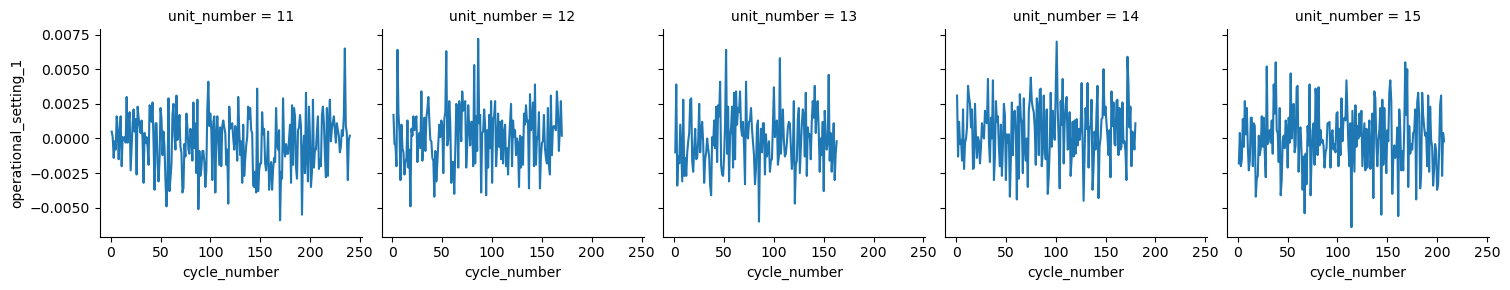

20


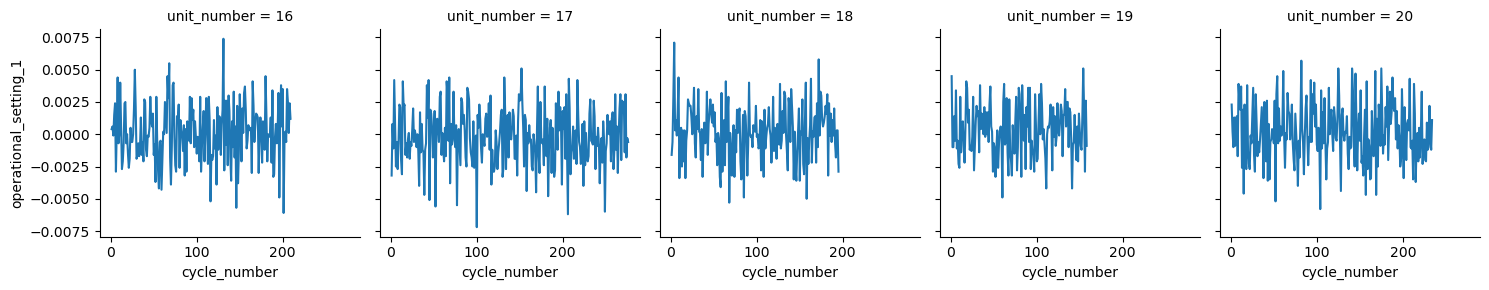

25


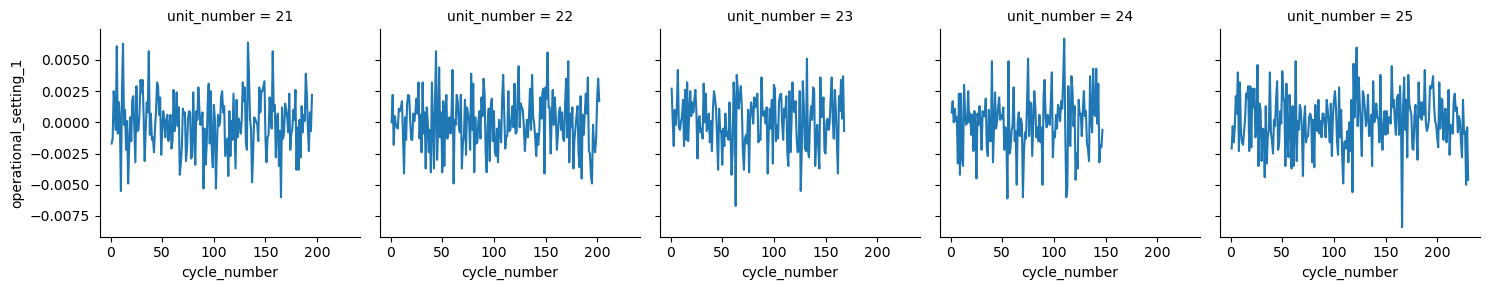

30


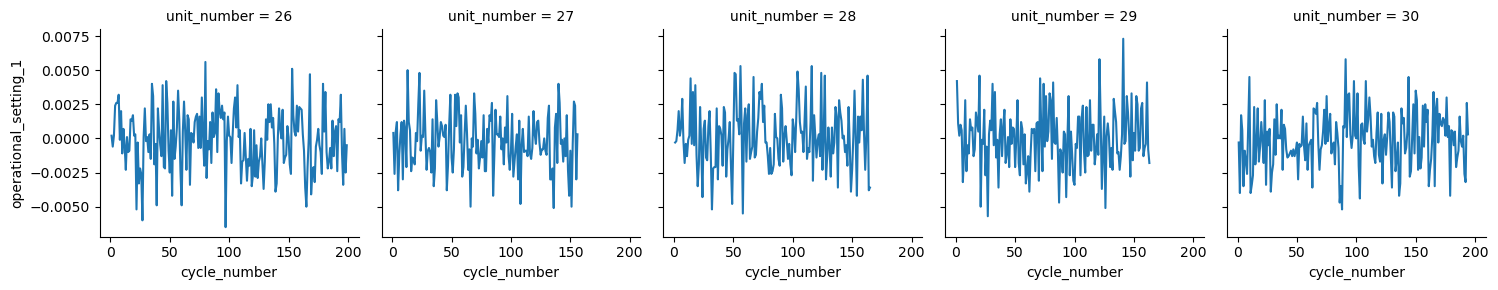

35


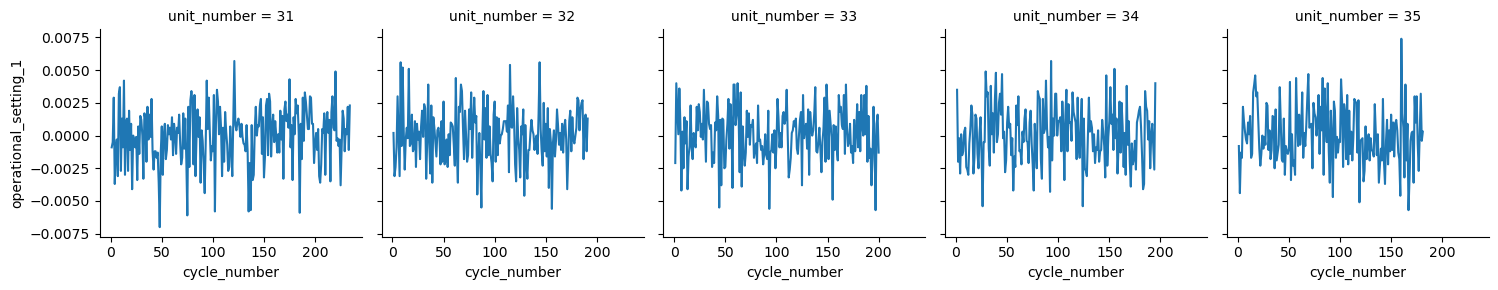

40


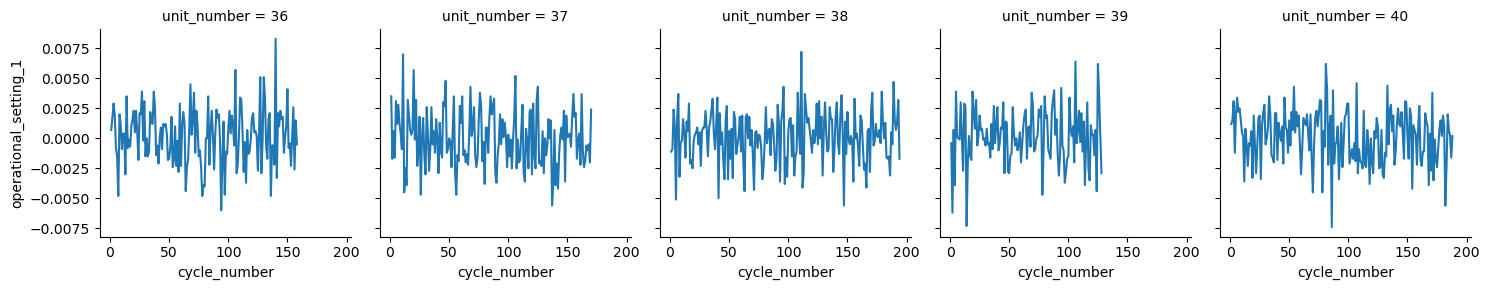

45


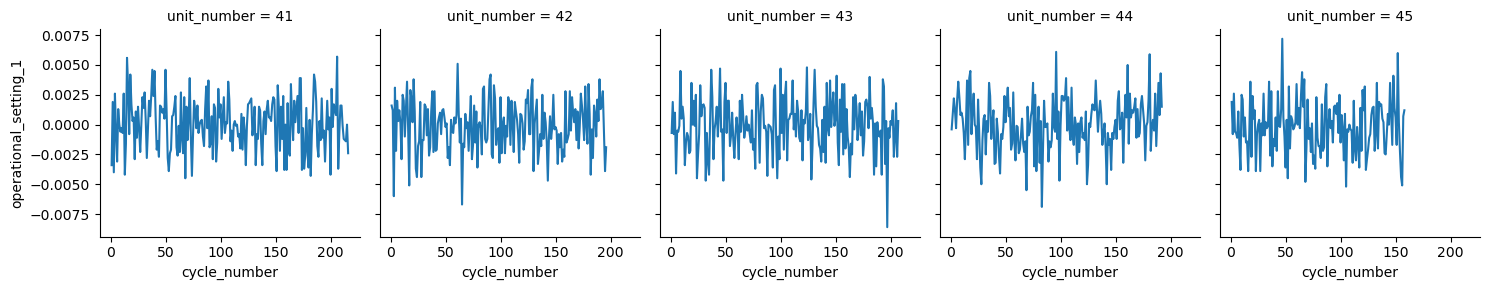

50


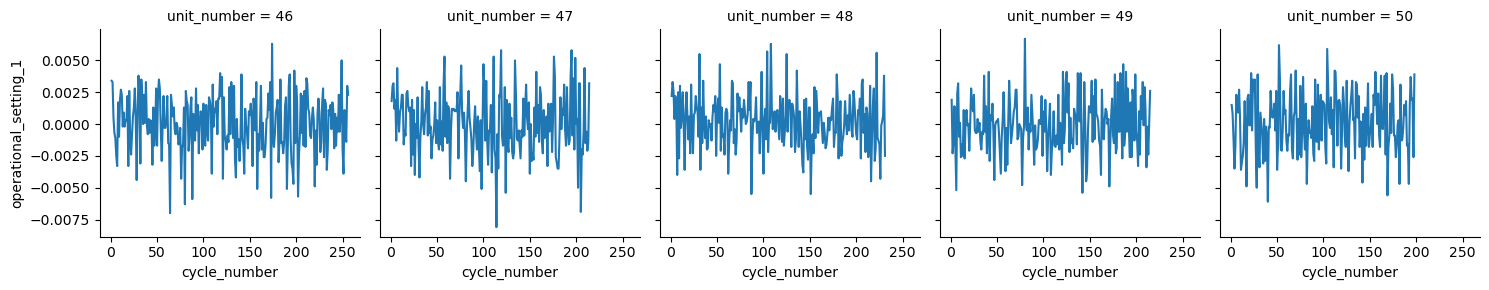

55


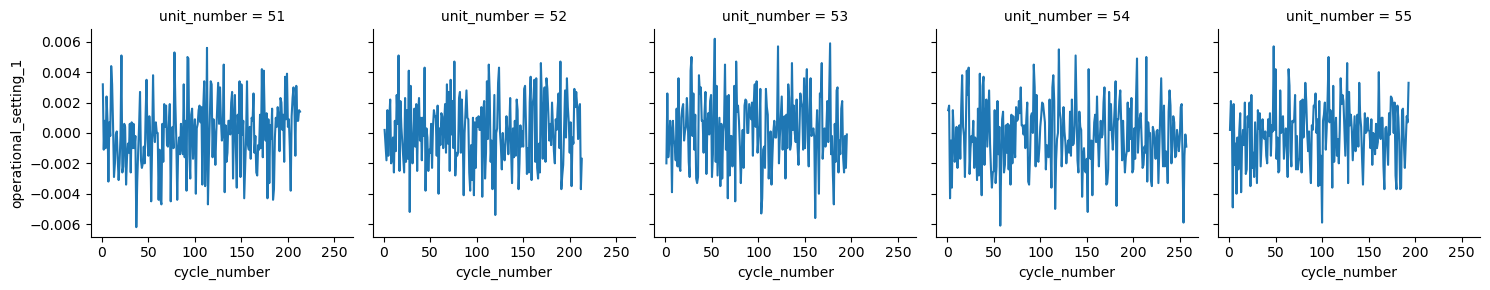

60


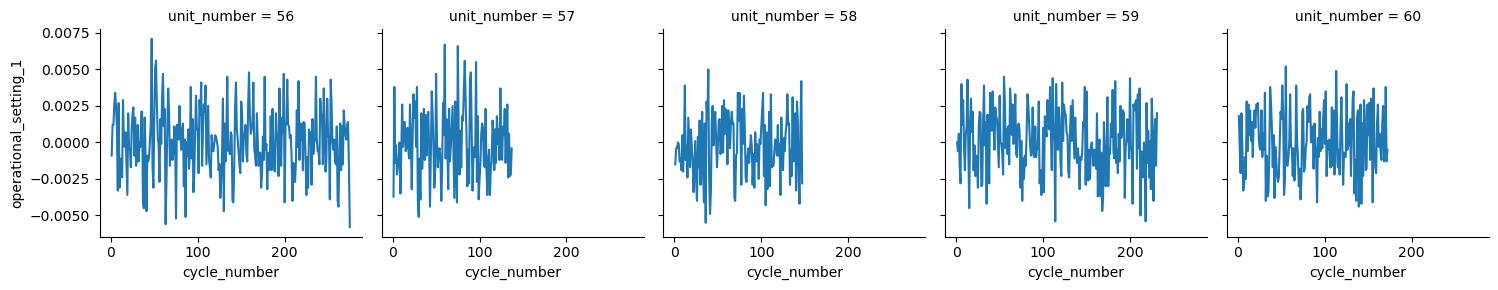

65


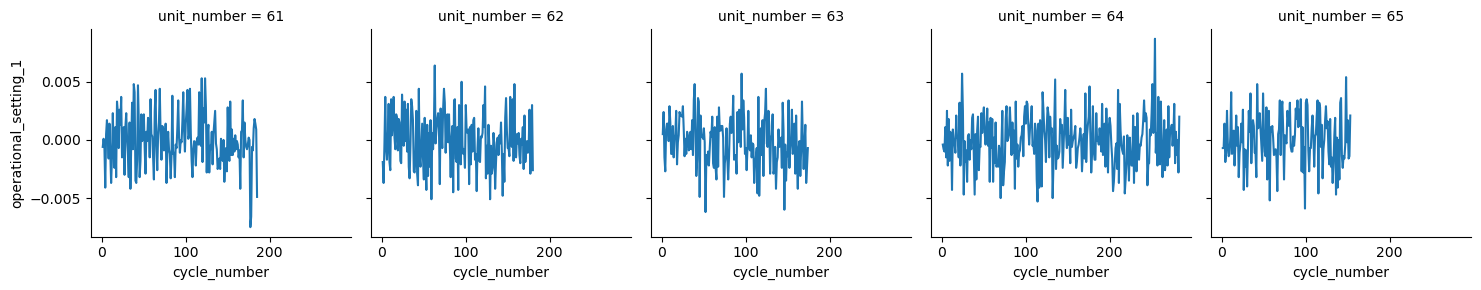

70


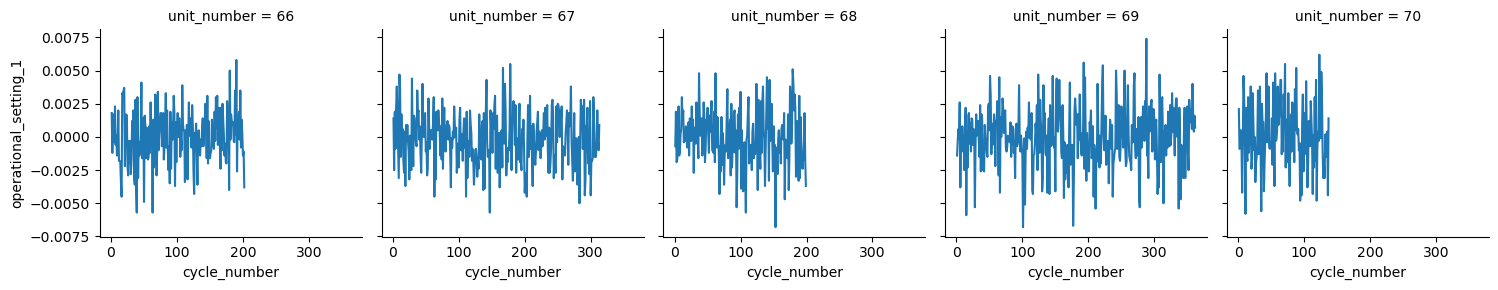

75


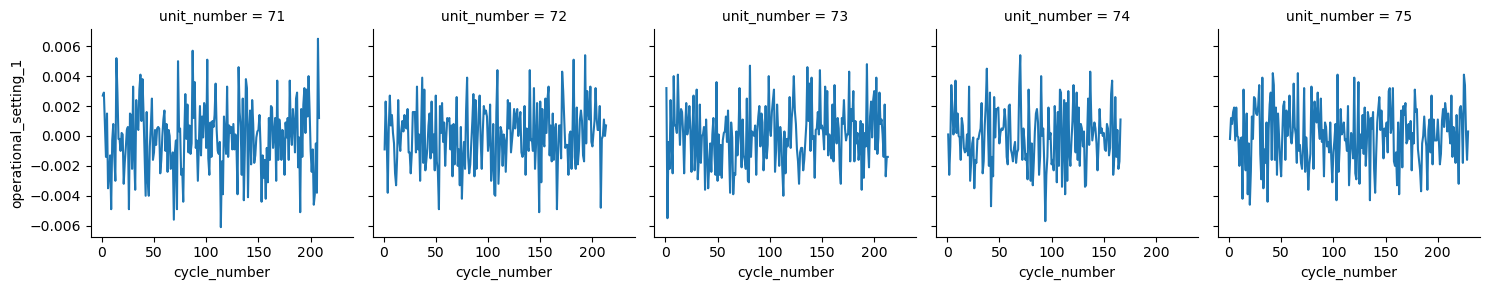

80


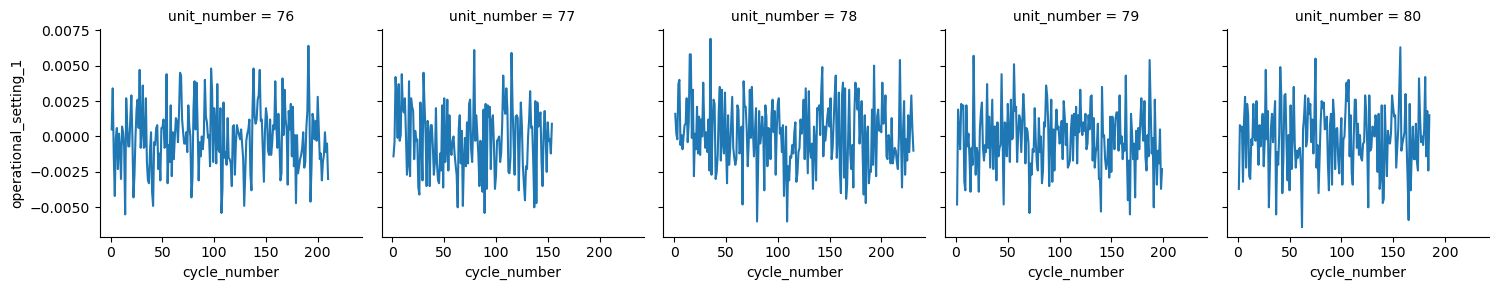

85


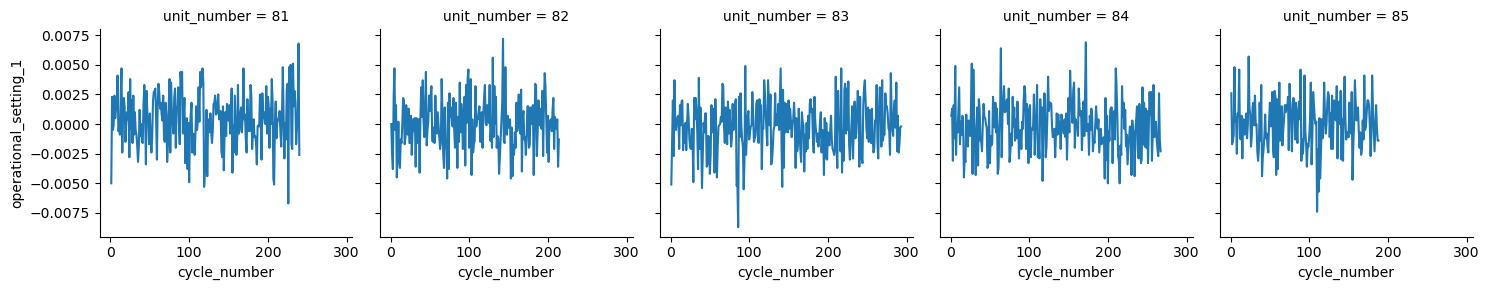

90


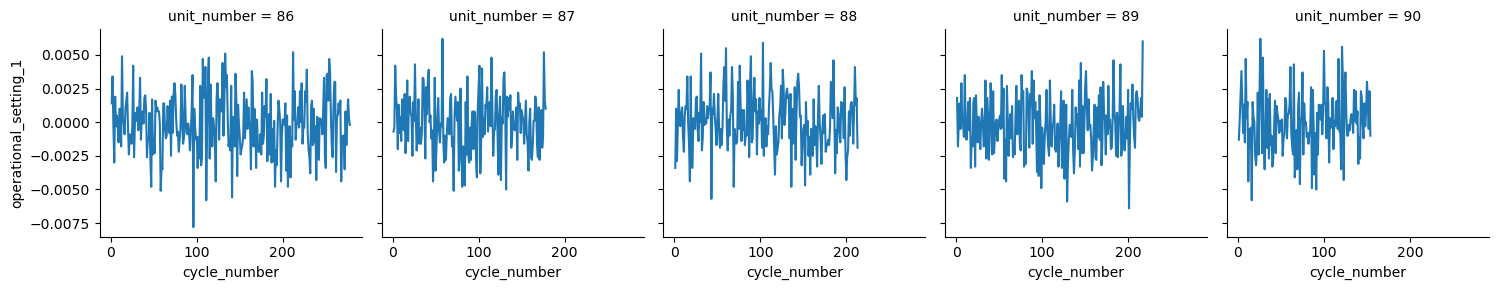

95


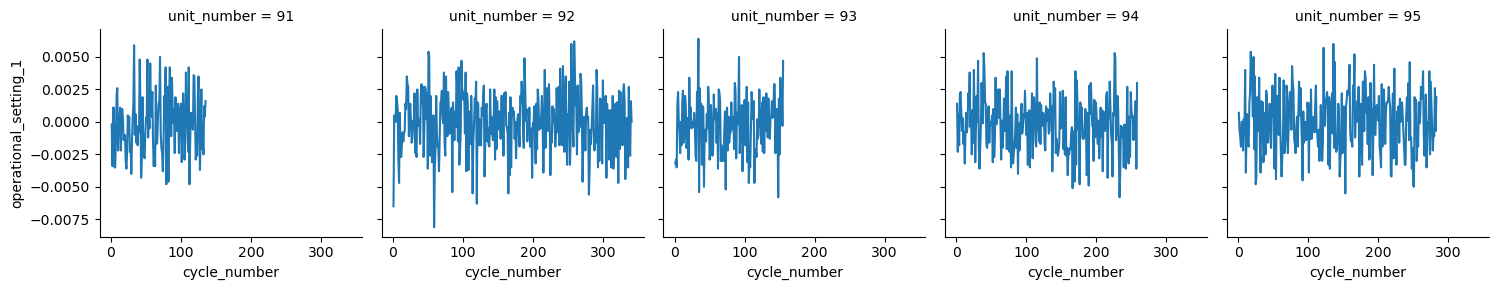

100


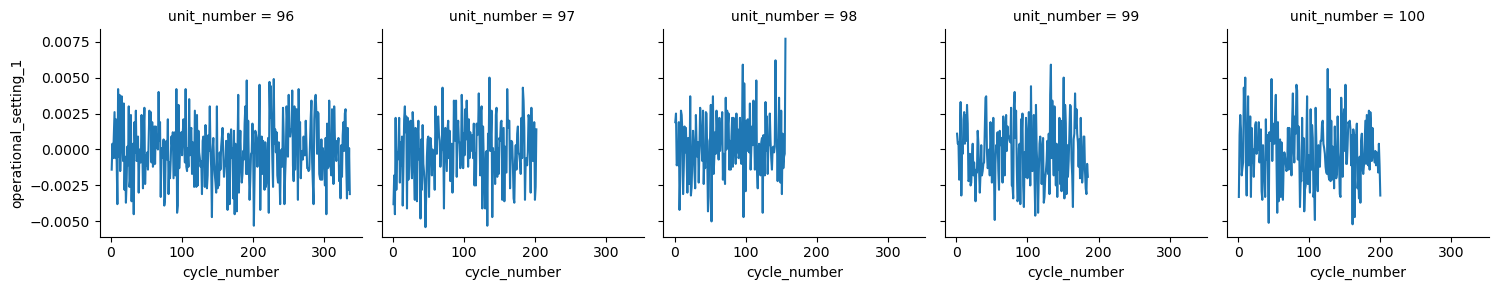

In [9]:
# Let's take a look at the data, we know we have the same characteristics for multiple engines, so let's make a FacetGrid in seaborn
# Let's chunk the plots in groups of 5 
increment = 5
for index, section in enumerate(np.arange(5,105,increment)):
    print(section)
    g = sns.FacetGrid(df[(df["unit_number"]>(section-increment)) & (df["unit_number"]<=section)], col="unit_number",sharex=True)
    g.map(sns.lineplot, "cycle_number", "operational_setting_1")
    # g.map(sns.lineplot, "cycle_number", "sensor_measurement_20")
    plt.show()
    
# Unit 39 dies the earliest, why?
# Units 67 and 96 are very long-lasting, why?

In [32]:
# Let's make sure that I am selecting the correct data
long_short_living_units = df[(df["unit_number"]==69) | (df["unit_number"]==39) ]
print("Uni"long_short_living_units["unit_number"].unique())
long_short_living_units.head()

[39 69]


,unit_number,cycle_number,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
7509,39,1,-0.0004,-0.0002,100.0,518.67,642.72,1592.37,1410.00,14.62,...,8133.27,8.4451,0.03,392,2388,100.0,38.90,23.2947,NaN,NaN
7510,39,2,-0.0062,0.0002,100.0,518.67,642.61,1586.25,1407.99,14.62,...,8126.00,8.4279,0.03,395,2388,100.0,38.82,23.4604,NaN,NaN
7511,39,3,0.0007,-0.0000,100.0,518.67,642.26,1586.25,1407.48,14.62,...,8123.32,8.4143,0.03,394,2388,100.0,38.73,23.2669,NaN,NaN
7512,39,4,-0.0039,0.0005,100.0,518.67,642.46,1587.90,1405.23,14.62,...,8123.19,8.4599,0.03,394,2388,100.0,38.82,23.3789,NaN,NaN
7513,39,5,0.0039,0.0002,100.0,518.67,642.31,1587.08,1408.78,14.62,...,8125.88,8.4607,0.03,394,2388,100.0,38.73,23.3338,NaN,NaN


In [11]:
longest_cycles = long_short_living_units[long_short_living_units["unit_number"]==69]["cycle_number"].max()
shortest_cycles = long_short_living_units[long_short_living_units["unit_number"]==39]["cycle_number"].max()
print("Min cycles: {} and Max cycles: {}".format(shortest_cycles, longest_cycles))

Min cycles: 128 and Max cycles: 362


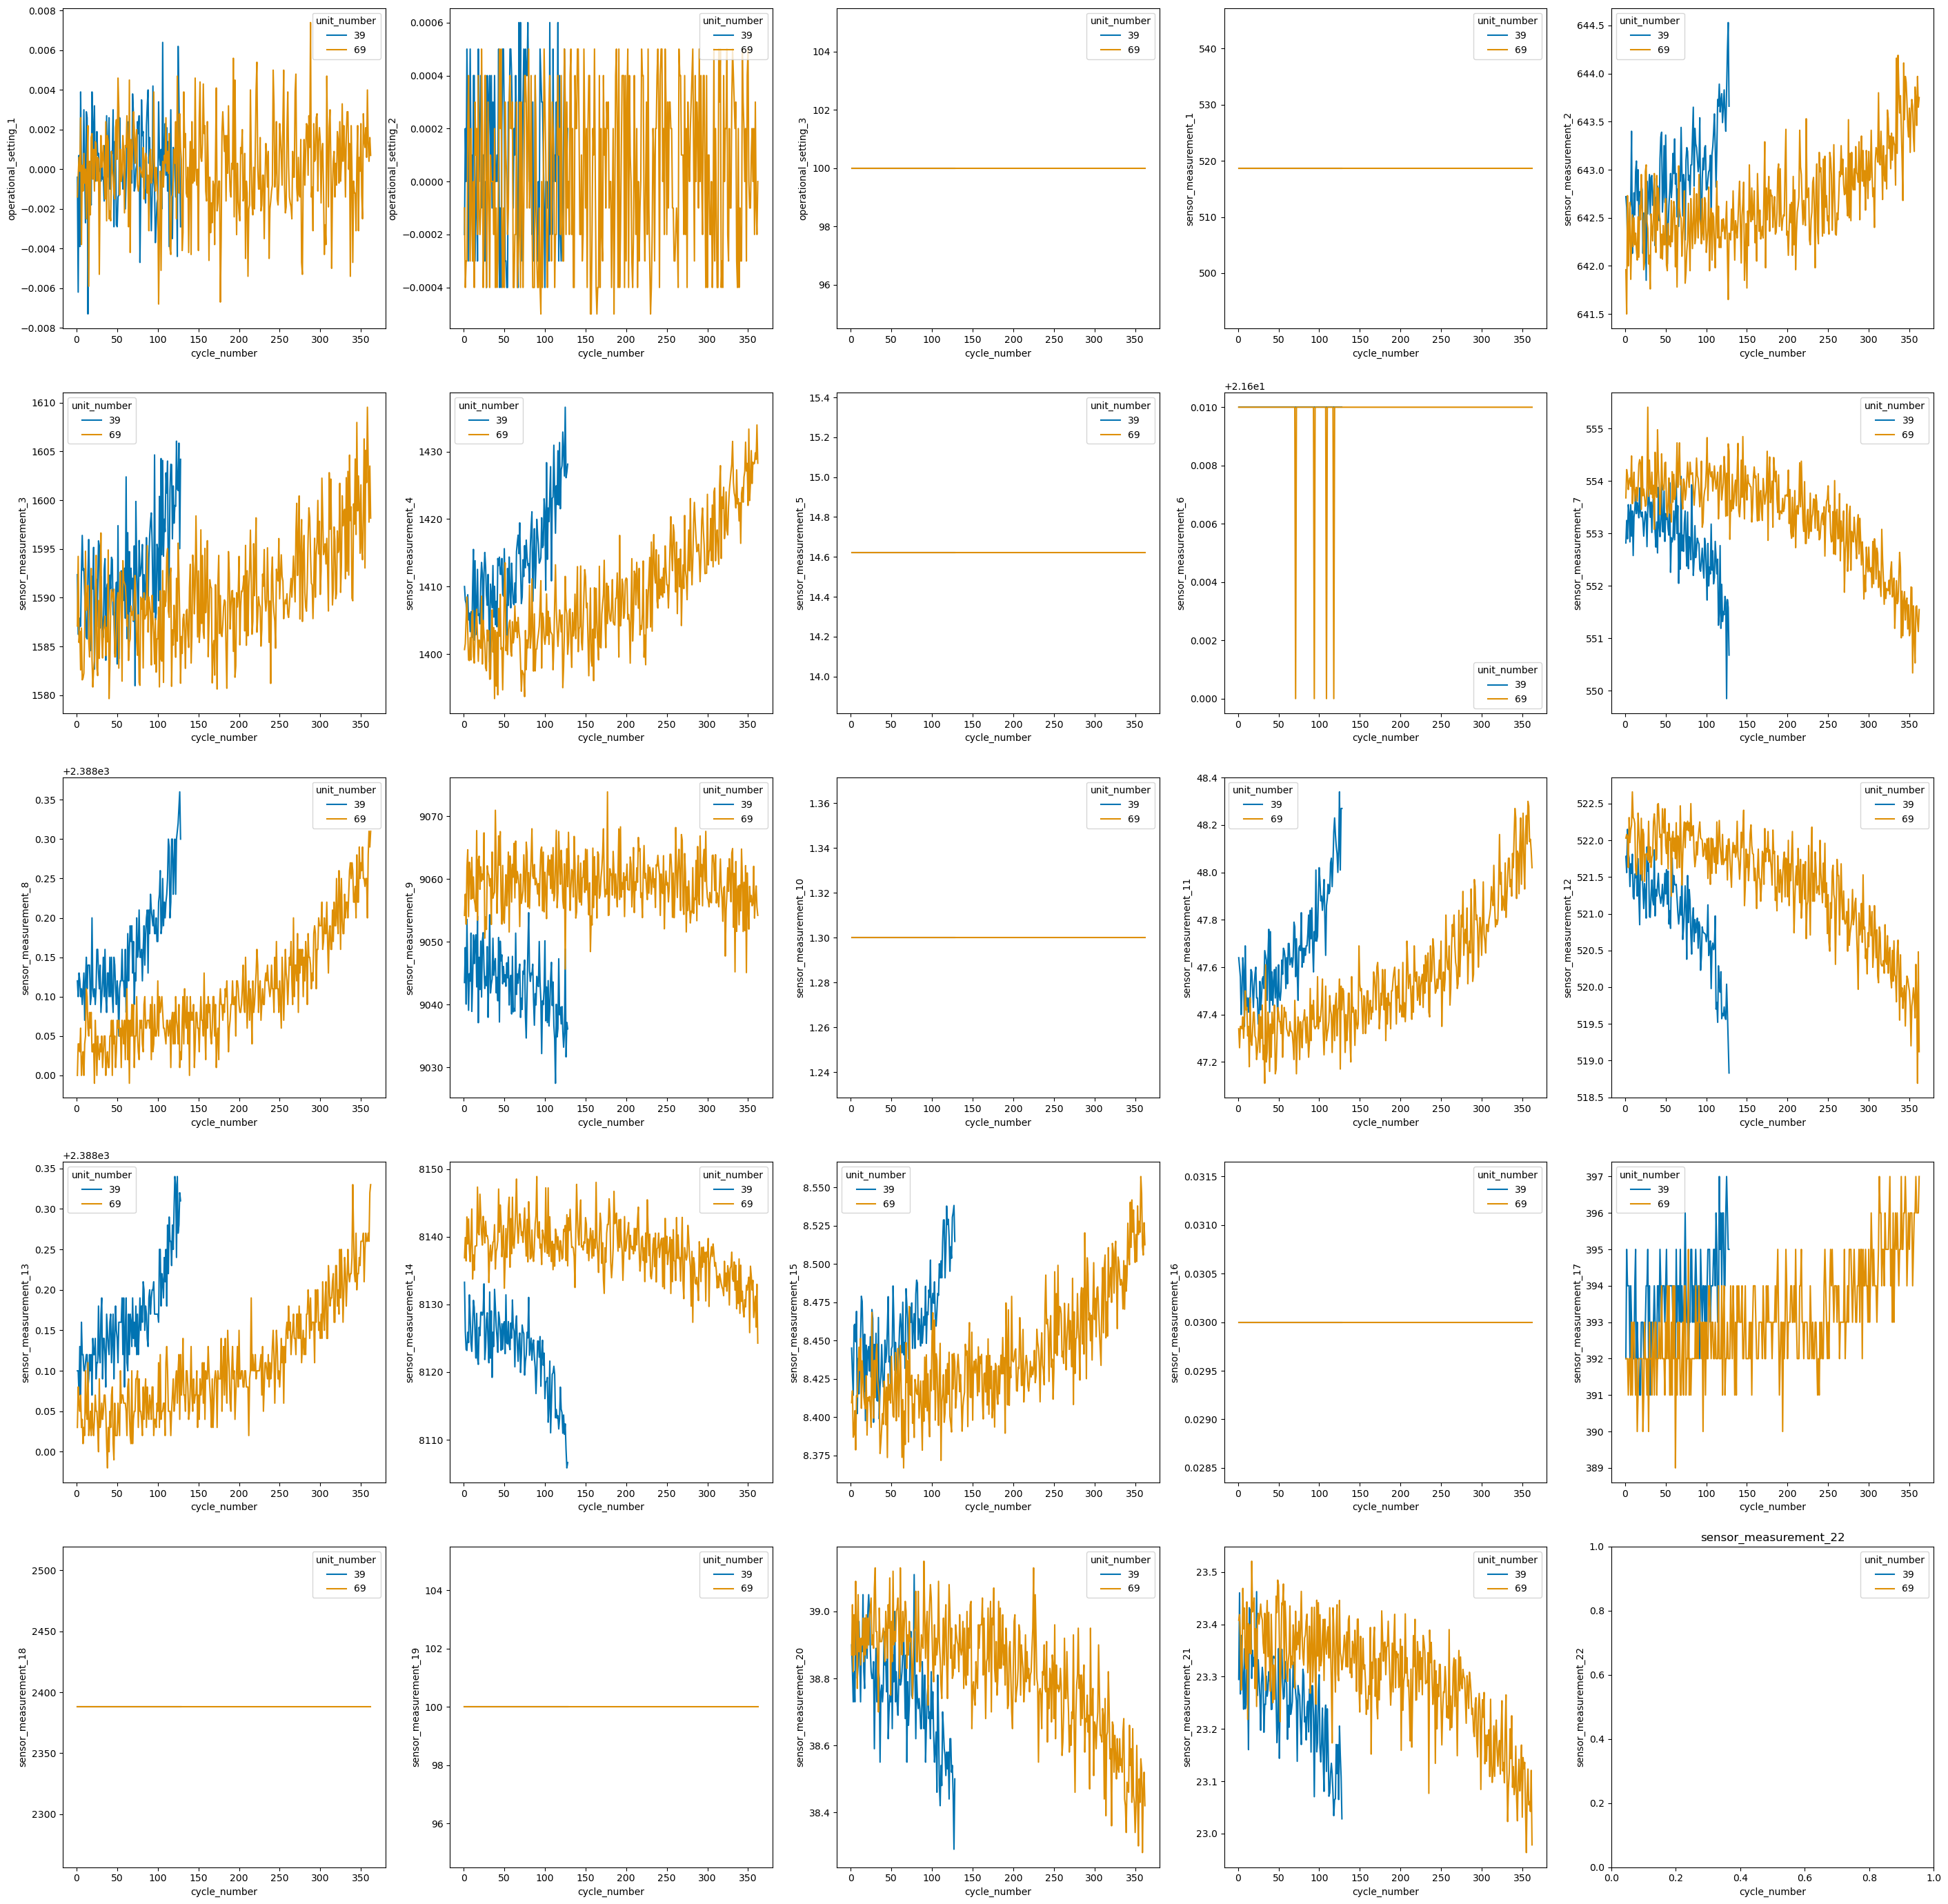

In [30]:
# Let's take a look at the sensor data for units 69 and 39 which are the longest and shortest living units

# There are 26 sensors, 24 with meaningful data so let's make a 5 by 5 grid, the last 2 are NAN plots anyway
fig, axes = plt.subplots(5, 5, figsize=(35, 35))
# fig.suptitle("Longest vs Shortest living engine")
for var, ax in zip(list(df.columns)[2:], axes.flat):
    # print(var)
    sns.lineplot(data = long_short_living_units , x = "cycle_number", y = var, hue=long_short_living_units["unit_number"], 
                 palette="colorblind",
                 ax=ax
                )
    plt.title(var)

# Ok so, I guess it makes sense that the sensor data is VERY different between the two